# Probability & Statistics    (Ahmed Sharaf)
### Confidence Interval (CI)
<img src="img/ci.png">

In [1]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from scipy.stats import t
from scipy.stats import norm

def calc_CI(data):
    x_ = data['Salary'].mean()
    s_ = data['Salary'].std()
    se = (s_ / np.sqrt(len(data)))
    z_value  = norm.ppf(0.5+(0.95 / 2))
    t_value  = t.ppf(0.5+(0.95/2), len(data) - 1)
    CI_H_Z = x_ + z_value * se
    CI_L_Z = x_ - z_value * se
    CI_H_T = x_ + t_value * se
    CI_L_T = x_ - t_value * se
    print(f"CI Using Z Test[{CI_L_Z}, {CI_H_Z}]")
    print(f"CI Using T Test[{CI_L_T}, {CI_H_T}]")

### Within how many standard deviations the estimated sample mean should be located for CIs 90%, 92%, 95%, 98%, 99%.  

In [3]:
print(f"standard deviations for 90% = {norm.ppf(0.5+0.9/2)}")
print(f"standard deviations for 92% = {norm.ppf(0.5+0.92/2)}")
print(f"standard deviations for 95% = {norm.ppf(0.5+0.95/2)}")
print(f"standard deviations for 98% = {norm.ppf(0.5+0.98/2)}")
print(f"standard deviations for 99% = {norm.ppf(0.5+0.99/2)}")

standard deviations for 90% = 1.6448536269514722
standard deviations for 92% = 1.7506860712521692
standard deviations for 95% = 1.959963984540054
standard deviations for 98% = 2.3263478740408408
standard deviations for 99% = 2.5758293035489004


### Calculate the expected mean salary with 95% CI for each team for the employees data as follow:
##### Using z-value.
##### Using t-value.
##### Perform  sns.barplot() and check out the displayed confidence intervals. Compare with your results.

In [4]:
df = pd.read_csv("data/employees.csv")
df.dropna(inplace=True)
df.head()


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


In [5]:
df['Team'].value_counts()

Business Development    88
Client Services         85
Product                 83
Finance                 80
Engineering             79
Human Resources         76
Marketing               74
Sales                   72
Legal                   67
Distribution            60
Name: Team, dtype: int64

In [6]:
bus_dev = df[df['Team'] == 'Business Development']
cli_ser = df[df['Team'] == 'Client Services']
prod_team = df[df['Team'] == 'Product']
fina_team = df[df['Team'] == 'Finance']
eng_team = df[df['Team'] == 'Engineering']
hum_team = df[df['Team'] == 'Human Resources']
mark_team = df[df['Team'] == 'Marketing']
sales_team = df[df['Team'] == 'Sales']
legal_team = df[df['Team'] == 'Legal']
dist_team = df[df['Team'] == 'Distribution']


In [7]:
print("CI For Business Development")
calc_CI(bus_dev)
print("\nCI For Client Services")
calc_CI(cli_ser)
print("\nCI For Product")
calc_CI(prod_team)
print("\nCI For Finance")
calc_CI(fina_team)
print("\nCI For Engineering")
calc_CI(eng_team)
print("\nCI For Human Resources")
calc_CI(hum_team)
print("\nCI For Marketing")
calc_CI(mark_team)
print("\nCI For Sales")
calc_CI(sales_team)
print("\nCI For Legal")
calc_CI(legal_team)
print("\nCI For Distribution")
calc_CI(dist_team)

CI For Business Development
CI Using Z Test[83415.85520894933, 97624.94024559611]
CI Using T Test[83315.64924380503, 97725.14621074041]

CI For Client Services
CI Using Z Test[82663.92562975576, 96009.39201730308]
CI Using T Test[82566.40088115165, 96106.91676590718]

CI For Product
CI Using Z Test[80050.49369475136, 93821.434016092]
CI Using T Test[79947.3693343491, 93924.55837649426]

CI For Finance
CI Using Z Test[86873.95588709388, 102164.19411290612]
CI Using T Test[86755.04001583232, 102283.10998416768]

CI For Engineering
CI Using Z Test[87064.07381232028, 101674.736314262]
CI Using T Test[86948.96396307778, 101789.8461635045]

CI For Human Resources
CI Using Z Test[83725.1468267715, 98565.19527849165]
CI Using T Test[83603.478267784, 98686.86383747915]

CI For Marketing
CI Using Z Test[83348.40761498279, 98179.75454717937]
CI Using T Test[83223.42420248679, 98304.73795967537]

CI For Sales
CI Using Z Test[84563.59566742224, 98886.04322146664]
CI Using T Test[84439.4434040992, 9

<Axes: xlabel='Team', ylabel='Salary'>

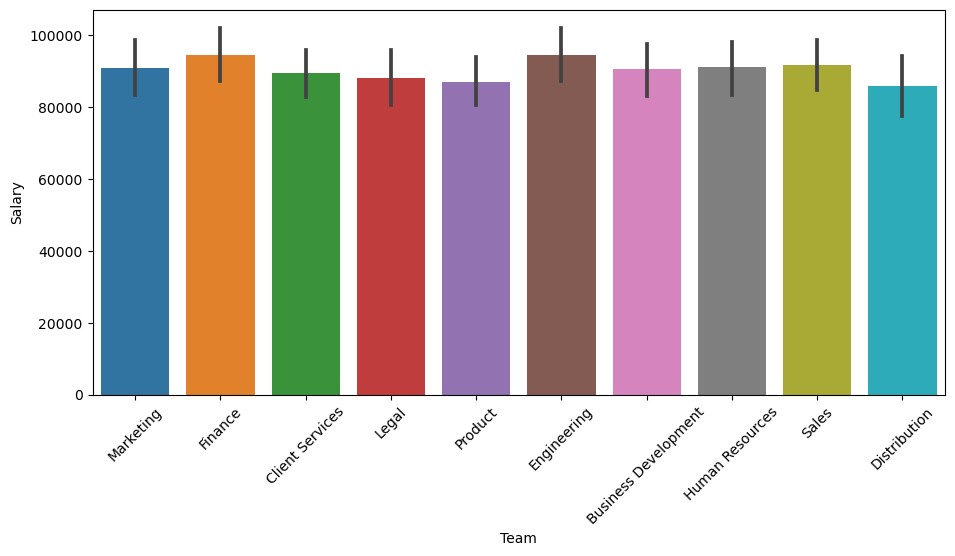

In [8]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=45)
sns.barplot(data = df, x = 'Team', y = 'Salary')

## Hypothesis Testing
<img src = "img/hypo.png">

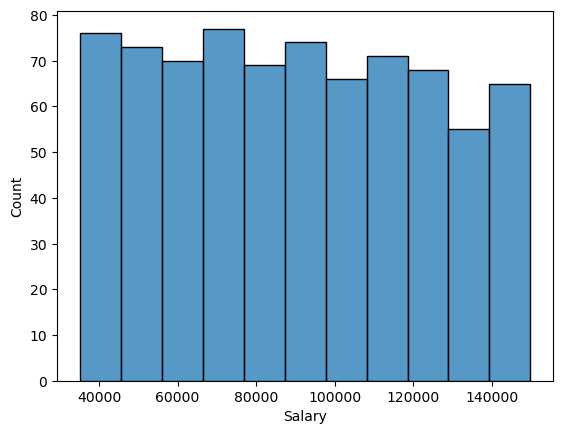

In [9]:
# Plot a histogram of salary.
sns.histplot(data = df, x = 'Salary');

### For all of the following Hypothesis Tests you must:
#### Define your null and alternate Hypothesis.
#### Perform z-test and t-test. (this is only used for comparison. However, you should know z-test is used for proportion and t-test is used for mean).
#### State which test you need (two tailed / one tailed - right or left )
#### The calculation must be performed using the Hypothesis test equations. 
#### i.e., calculate the standard error then calculate the z or t values then calculate p-value once using z-distribution and once using t-distribution.
#### Repeat using statsmodels.stats.weightstats.ztest() and scipy.stats.ttest_1samp() to confirm the obtained results.
#### Write down your conclusion (Reject H0 or not).

In [10]:
from scipy import stats as st
import statsmodels.api as sm
def calc_hypo(data, h0, a, m = 2, alter_z = 'two-sided', alter_t = 'two-sided'):
    x_ = data['Salary'].mean()
    s_ = data['Salary'].std()
    c  = data['Salary'].count()
    se = s_ / np.sqrt(c)
    t_value = (x_ - h0) / se
    p_value = abs((a - t.cdf(t_value, c-1))) * m
    print("Result Using Equation: ")
    print(f"t-value = {t_value}")
    print(f"p-value = {p_value}")
    print("\nResult Using Built In: ")
    # check
    print(sm.stats.ztest(data['Salary'],value=h0, alternative = alter_z))
    print(st.ttest_1samp(data['Salary'],h0, alternative = alter_t))

### The claim is that the mean salary is 90000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [11]:
calc_hypo(df, 90000, a = 1)

Result Using Equation: 
t-value = 0.3643361288778425
p-value = 0.7157079691365715

Result Using Built In: 
(0.3643361288778422, 0.7156070241477364)
TtestResult(statistic=0.3643361288778422, pvalue=0.7157079691365718, df=763)


### The claim is that the mean salary is 100000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [12]:
calc_hypo(df, 100000, a = 0)

Result Using Equation: 
t-value = -8.046079642801976
p-value = 3.2669251040774328e-15

Result Using Built In: 
(-8.04607964280197, 8.548837039392978e-16)
TtestResult(statistic=-8.04607964280197, pvalue=3.266925104077574e-15, df=763)


### The claim is that the mean salary is greater than or equal to 92000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [13]:
calc_hypo(df, 92000, a = 0, m = 1, alter_z = 'smaller', alter_t = 'less')

Result Using Equation: 
t-value = -1.3177470254581212
p-value = 0.0939919301061735

Result Using Built In: 
(-1.3177470254581203, 0.09379417338868268)
TtestResult(statistic=-1.3177470254581203, pvalue=0.0939919301061736, df=763)


### The claim is that the mean salary is greater than or equal to 93000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [14]:
calc_hypo(df, 93000, a = 0, m = 1, alter_z = 'smaller', alter_t = 'less')

Result Using Equation: 
t-value = -2.158788602626103
p-value = 0.015588852380115925

Result Using Built In: 
(-2.1587886026261014, 0.015433285555675419)
TtestResult(statistic=-2.1587886026261014, pvalue=0.015588852380116005, df=763)


### The claim is that the mean salary is less than or equal to 88000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [15]:
calc_hypo(df, 88000, a = 1, m = 1, alter_z = 'larger', alter_t = 'greater')

Result Using Equation: 
t-value = 2.0464192832138064
p-value = 0.020528674104731914

Result Using Built In: 
(2.0464192832138046, 0.020357568230288822)
TtestResult(statistic=2.0464192832138046, pvalue=0.020528674104732036, df=763)


### The claim is that the mean salary is less than or equal to 90000. Check if the data supports this claim or not. i.e., reject this claim or not.

In [16]:
calc_hypo(df, 88000, a = 1, m = 1, alter_z = 'larger', alter_t = 'greater')

Result Using Equation: 
t-value = 2.0464192832138064
p-value = 0.020528674104731914

Result Using Built In: 
(2.0464192832138046, 0.020357568230288822)
TtestResult(statistic=2.0464192832138046, pvalue=0.020528674104732036, df=763)
